## Box Cox Transformation

A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. 
Box and Cox proposed a parametric power transformation technique defined by a single parameter λ, aimed at reducing anomalies in the data and ensuring that the usual assumptions for a linear model hold. This transformation results from modifying the family of power transformations defined by Tukey  to account for the discontinuity at λ = 0.

Let y=(y1,y2,…,yn)′ be the data on which the Box–Cox transformation is to be applied. Box and Cox defined their transformation as

$$
y_{(i)}^{(λ)}=λ^{−1}(y_{i}^{λ}−1)  \;\;\;\;\;\;   if  \;\;\;\;\;\;  λ≠0
$$

$$
log(y_i)               \;\;\;\;\;\;            if  \;\;\;\;\;\;  λ=0   \;\;\;\;\;\; (1) 
$$

such that, for unknown λ,

$$
y^λ=Xβ+ϵ
$$
where y(λ) is the λ-transformed data, X is the design matrix (possible covariates of interest), β is the set of parameters associated with the λ-transformed data, and ϵ = (ϵ1, ϵ2, …, ϵn) is the error term. Since the aim of Equation (1) is that

$$
y^{(λ)} ϵ ~ N(Xβ,σ^2*I_n),    (3)
$$
then ϵ ~ N(0, σ2). Note that the transformation in Equation (1) is only valid for yi > 0, i = 1, 2, …, n, and modifications have to be made when negative observations are present.

In [4]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox

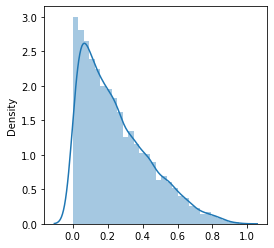

In [8]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
data = np.random.beta(1, 3, 5000) # we create random non normal data (from beta distribution)
sns.distplot(data)
plt.show()

In [9]:
data_transformed, lambda_ = boxcox(data) #If the lambda parameter is None, the second returned argument is the 
# lambda that maximizes the log-likelihood function.
print('Transformed data into normal distibution:', data_transformed)
print(40*'==')
print('Lambda that maximizes the log-likelihood function for normal distribution:', lambda_)

Transformed data into normal distibution: [-2.01054071 -1.79406199 -1.0597953  ... -1.65388475 -0.92313735
 -1.69962455]
Lambda that maximizes the log-likelihood function for normal distribution: 0.39321032751806273


In [14]:
manually_transformed = [(i**lambda_ -1)/lambda_ for i in data] # manual implementation of the formula

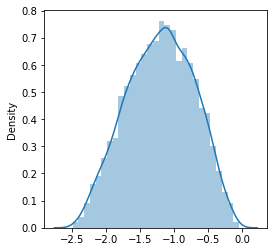

In [13]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(data_transformed)
plt.show()

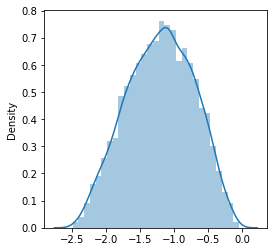

In [16]:
warnings.filterwarnings('ignore')
plt.figure(figsize = (4, 4))
sns.distplot(manually_transformed) # manually transformed vector with the calculatet best lambda parameter
plt.show()

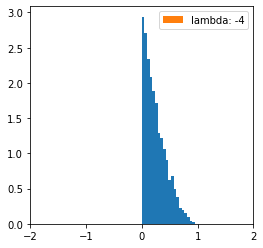

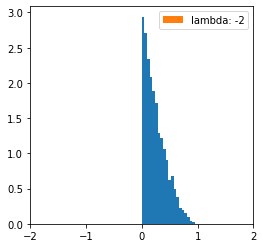

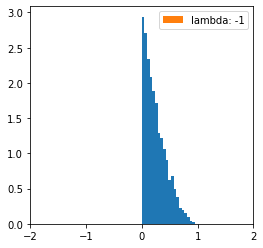

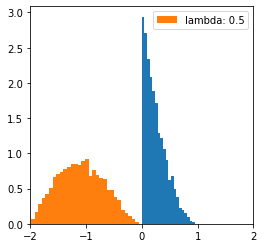

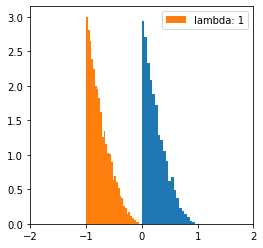

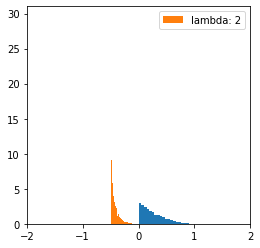

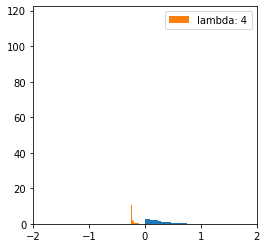

In [20]:
lambde = [-4,-2,-1,0.5,1,2,4] # only for lambda 0.5 we got transformed distribution that is normal
x = np.linspace(data.min(), data.max(), 5000)
for l in lambde:
    transformed = [(i**l -1)/l for i in data]
    plt.figure(figsize=(4,4))
    plt.hist(data, bins=20, density=True)
    plt.hist(transformed, bins=30, density=True, label = f'lambda: {l}')
    plt.xlim(-2, 2)
    plt.legend()